# Homework 1: Finding Similar Items: Textually Similar Documents 

#### Team Members: Noel Karlsson Johansson, Alexander Olsson

#### Dataset
https://www.kaggle.com/competitions/whats-cooking-kernels-only

Instructions:
1. Download the dataset from the link above called train.json (12.42MB)
2. Place the file in any directory you want
3. Rename the file to recipes.json
4. Change the path in the code below to the path of the file i.e the variable called SETTINGS
5. Place the classes.py and utils.py in the same directory as the main.ipynb file
6. Install the packages in the requirements.txt file
7. Run the code

This code implements LSH as well, which can be found further down.

In [16]:
from classes import *
from utils import *

In [2]:
# ___ DATA PIPELINE ___
SETTINGS = {
    'n_documents': 250, # Desired number of documents to evaluate
    'file_path': 'C:/Github/ID2222/data/', # CHANGE THIS TO YOUR PATH
    'file_name': 'recipes.json'
}

data_pipeline = DataPipeline(SETTINGS)
df_documents = data_pipeline.df_documents
df_documents.head()

,doc_id,document_text
0,10259,romaine lettuce black olives grape tomatoes ga...
1,25693,plain flour ground pepper salt tomatoes ground...
2,20130,eggs pepper salt mayonaise cooking oil green c...
3,22213,water vegetable oil wheat salt
4,13162,black pepper shallots cornflour cayenne pepper...


In [3]:
print('Number of documents: ', len(df_documents))

Number of documents:  250


## Shingling

In [4]:
# ___ SHINGLING ___
k = 2
shingling_obj = Shingling(k)                   # Create shingling object with k value 
shingling_vectors = shingling_obj(df_documents)    # Create shingling vectors

### Compare Sets

In [5]:
# ___ JACCARD SIMILARITY (CompareSets) ___
compare_sets = CompareSets()
df_jaccard = compare_sets(shingling_vectors)        # Calculate Jaccard similarity, store in dataframe

In [6]:
df_jaccard

,document1,document2,value
0,0,1,0.327731
1,0,2,0.343750
2,0,3,0.135417
3,0,4,0.333333
4,0,5,0.234848
...,...,...,...
31120,246,248,0.194245
31121,246,249,0.350318
31122,247,248,0.205357
31123,247,249,0.274648


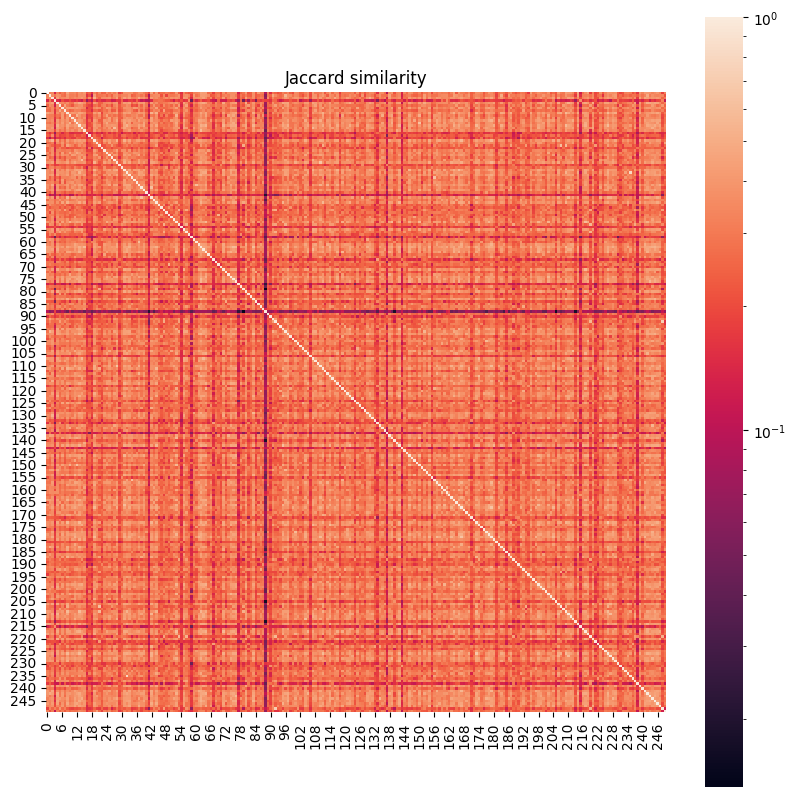

In [7]:
heat_map(df_jaccard, 'Jaccard similarity', 'C:/Github/ID2222/assets/', n = 250)

## MinHashing

In [8]:
n = 125
seed = 42
minhashing_obj = MinHashing(signature_size=n, seed=seed)
minhash_signatures= minhashing_obj(shingling_vectors)   

### Compare Sets

In [9]:
compare_signatures = CompareSignatures()
compare_signatures = compare_signatures(minhash_signatures)
compare_signatures

,document1,document2,value
0,0,1,0.328
1,0,2,0.344
2,0,3,0.184
3,0,4,0.304
4,0,5,0.208
...,...,...,...
31120,246,248,0.168
31121,246,249,0.288
31122,247,248,0.208
31123,247,249,0.216


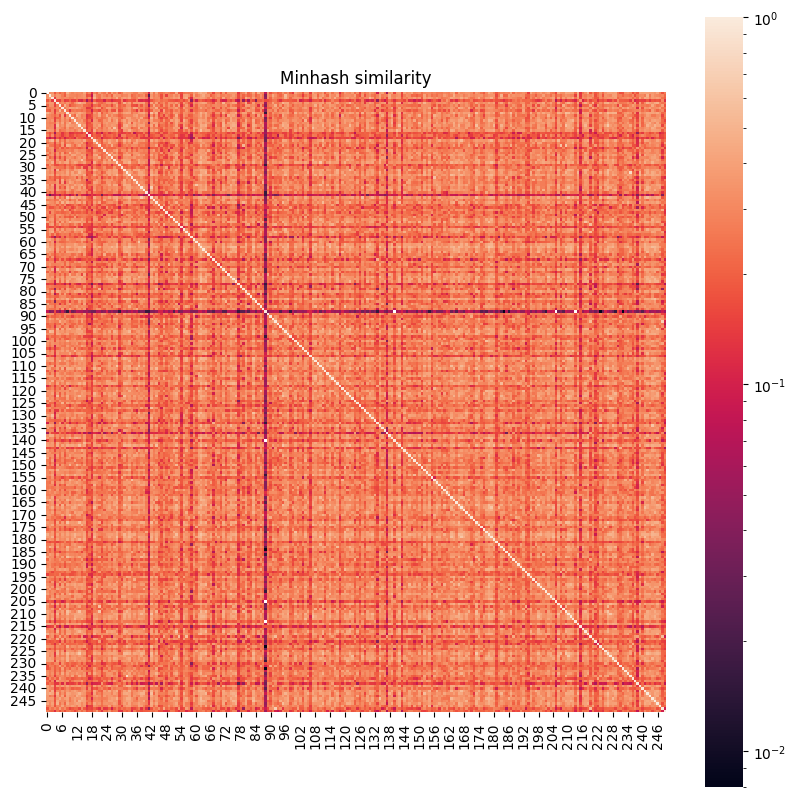

In [10]:
heat_map(compare_signatures, 'Minhash similarity', 'C:/Github/ID2222/assets/', n = 250)

## LSH

We have not tuned the parameters for LSH, so the results are not optimal. For the presentation we can show how to tune the parameters. i.e number of bands and number of buckets.

In [11]:
num_bands = 5       # Number of bands (sub-vectors) to divide a signature into
num_buckets = 25
band_size = int(n / num_bands)
threshold = (1/num_bands)**(1/band_size) # Threshold for candidate pairs
lsh_obj = LSH(signature_size=n, num_bands=num_bands, num_buckets=num_buckets)
df_candidate_pairs = lsh_obj(minhash_signatures)
df_candidate_pairs

,id,candidates
0,0,"[0, 3, 4, 23, 24, 32, 41, 47, 48, 60, 69, 71, ..."
1,1,"[1, 6, 12, 15, 18, 30, 31, 34, 37, 38, 41, 46,..."
2,2,"[2, 6, 7, 16, 20, 25, 33, 35, 36, 42, 46, 48, ..."
3,3,"[0, 3, 4, 8, 11, 15, 22, 25, 30, 32, 37, 41, 4..."
4,4,"[0, 3, 4, 19, 28, 32, 36, 41, 42, 49, 50, 51, ..."
...,...,...
245,245,"[16, 28, 29, 31, 32, 34, 47, 52, 53, 54, 57, 7..."
246,246,"[0, 4, 5, 18, 19, 39, 44, 60, 63, 67, 72, 76, ..."
247,247,"[2, 6, 10, 16, 18, 24, 35, 46, 48, 50, 51, 64,..."
248,248,"[4, 6, 8, 50, 52, 56, 62, 70, 72, 90, 100, 103..."


In [12]:
# Combine candidate pairs from LSH with df_documents text
pairs = pd.merge(df_documents, df_candidate_pairs, left_index=True, right_index=True)
pairs

,doc_id,document_text,id,candidates
0,10259,romaine lettuce black olives grape tomatoes ga...,0,"[0, 3, 4, 23, 24, 32, 41, 47, 48, 60, 69, 71, ..."
1,25693,plain flour ground pepper salt tomatoes ground...,1,"[1, 6, 12, 15, 18, 30, 31, 34, 37, 38, 41, 46,..."
2,20130,eggs pepper salt mayonaise cooking oil green c...,2,"[2, 6, 7, 16, 20, 25, 33, 35, 36, 42, 46, 48, ..."
3,22213,water vegetable oil wheat salt,3,"[0, 3, 4, 8, 11, 15, 22, 25, 30, 32, 37, 41, 4..."
4,13162,black pepper shallots cornflour cayenne pepper...,4,"[0, 3, 4, 19, 28, 32, 36, 41, 42, 49, 50, 51, ..."
...,...,...,...,...
245,23147,tumeric fresh coriander paprika garlic puree g...,245,"[16, 28, 29, 31, 32, 34, 47, 52, 53, 54, 57, 7..."
246,44020,pickled jalapeno peppers water romaine lettuce...,246,"[0, 4, 5, 18, 19, 39, 44, 60, 63, 67, 72, 76, ..."
247,3245,white vinegar reduced sodium soy sauce kosher ...,247,"[2, 6, 10, 16, 18, 24, 35, 46, 48, 50, 51, 64,..."
248,40403,baking powder milk salt flour sugar vegetable ...,248,"[4, 6, 8, 50, 52, 56, 62, 70, 72, 90, 100, 103..."


## Evaluation

We used the following class for evaluating the execution time of our algorithms.

Set LSH = False if you want to evaluate the execution time of the MinHashing algorithm.

In [13]:
eval = Evaluation(k, n, seed, num_bands, num_buckets, SETTINGS, LSH = True)
elapsed_time = eval(df_documents=df_documents)
print('Elapsed time: ', elapsed_time)

Elapsed time:  1.330876350402832


### Evaluation on the candidate pairs

In [14]:
candidate_eval = candit_eval()
similar_docs = candidate_eval(df_candidate_pairs, shingling_vectors)

### S-Curve for LSH candidates

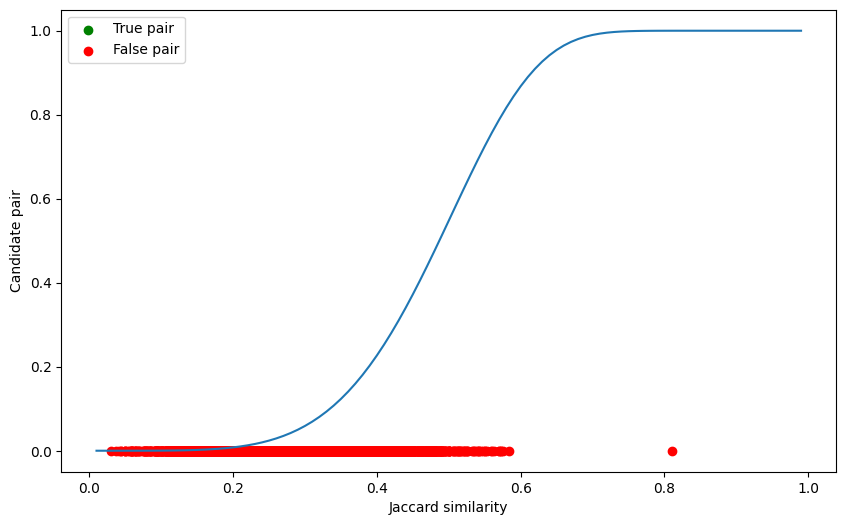

In [15]:
true_pair = similar_docs[similar_docs['jaccard_similarity'] >= threshold]
false_pair = similar_docs[similar_docs['jaccard_similarity'] < threshold]

# Plot candidates true/false [0,1] vs jaccard similarity
# plot a curve p = 1 - (1 - s^b)^r
s = [i/100 for i in range(1, 100)]
b = num_bands
r = num_buckets
plt.figure(figsize=(10, 6))
plt.scatter(true_pair['jaccard_similarity'], [1 for _ in range(len(true_pair.index))], color='green', label='True pair')
plt.scatter(false_pair['jaccard_similarity'], [0 for _ in range(len(false_pair.index))], color='red', label='False pair')
plt.plot(s, [1 - (1 - s**b)**r for s in s])
plt.xlabel('Jaccard similarity')
plt.ylabel('Candidate pair')
plt.legend()
plt.show()

### Execution time

If the images does not load, please look in the folder "results" for the images.
These are included in the zip file if you want to take a look at them.

![LSH execution time](/results/evaluation_times_lsh.png)
![non-LSH execution time](/results/evaluation_times.png)